# Walk through techniques to extract features

## Extract from categorical values

Many machine learning problems have categorical, or nominal, rather than continuous features. For example, an application that predicts a job's salary based on its description might use categorical features such as the job's location. Categorical variables are commonly encoded using one-of-K or one-hot encoding, in which the explanatory variable is encoded using one binary feature for each of the variable's possible values.
For example, let's assume that our model has a city explanatory variable that
can take one of three values: New York, San Francisco, or Chapel Hill. One-hot encoding represents this explanatory variable using one binary feature for each
of the three possible cities.

In [1]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()

instances = [{'city':"New York"},{'city':"San Fransisco"},{'city':"Chapel Hill"}]

In [2]:
print(onehot_encoder.fit_transform(instances).toarray())

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


## Extract from text

The most common representation of text is the bag-of-words model. This representation uses a multiset, or bag, that encodes the words that appear in a text; the bag-of-words does not encode any of the text's syntax, ignores the order of words, and disregards all grammar. Bag-of-words can be thought of as an extension to one-hot encoding. It creates one feature for each word of interest in the text. The bag-of-words model is motivated by the intuition that documents containing similar words often have similar meanings. The bag-of-words model can be used effectively for document classi cation and retrieval despite the limited information that it encodes.



In [3]:
corpus = [
    'UNC played Duke in basketball','Duke lost the basketball game'
]

This corpus contains eight unique words: UNC, played, Duke, in, basketball, lost, the, and game. The corpus's unique words comprise its vocabulary. The bag-of-words model uses a feature vector with an element for each of the words in the corpus's vocabulary to represent each document. Our corpus has eight unique words, so each document will be represented by a vector with eight elements. The number of elements that comprise a feature vector is called the vector's dimension. A dictionary maps the vocabulary to indices in the feature vector.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'the': 6, 'basketball': 0, 'in': 3, 'played': 5, 'unc': 7, 'game': 2, 'duke': 1, 'lost': 4}


In [8]:
 corpus = [
       'UNC played Duke in basketball',
       'Duke lost the basketball game',
       'I ate a sandwich'
]

In [9]:
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'the': 8, 'basketball': 1, 'in': 4, 'sandwich': 7, 'played': 6, 'unc': 9, 'ate': 0, 'game': 3, 'duke': 2, 'lost': 5}


In [17]:
from sklearn.metrics.pairwise import euclidean_distances
#Transform it to list
counts = vectorizer.fit_transform(corpus).todense().tolist()

In [27]:
#Check Euclidean distances
print("Distance between 1st and 2nd documents: ", euclidean_distances(counts[0],counts[1]))
print("Distance between 2st and 3nd documents: ", euclidean_distances(counts[1],counts[2]))
print("Distance between 1st and 3nd documents: ", euclidean_distances(counts[2],counts[0]))

Distance between 1st and 2nd documents:  [[ 2.44948974]]
Distance between 2st and 3nd documents:  [[ 2.64575131]]
Distance between 1st and 3nd documents:  [[ 2.64575131]]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1

### Use stop_words method to filter words with little meaning such as "the", "a", "an" etc

In [29]:

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'UNC played Duke in basketball',
     'Duke lost the basketball game',
     'I ate a sandwich'
]

In [30]:
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'basketball': 1, 'sandwich': 6, 'played': 5, 'unc': 7, 'ate': 0, 'game': 3, 'duke': 2, 'lost': 4}


In [32]:
counts = vectorizer.fit_transform(corpus).todense().tolist()

In [33]:
#Check Euclidean distances
print("Distance between 1st and 2nd documents: ", euclidean_distances(counts[0],counts[1]))
print("Distance between 2st and 3nd documents: ", euclidean_distances(counts[1],counts[2]))
print("Distance between 1st and 3nd documents: ", euclidean_distances(counts[2],counts[0]))

Distance between 1st and 2nd documents:  [[ 2.]]
Distance between 2st and 3nd documents:  [[ 2.44948974]]
Distance between 1st and 3nd documents:  [[ 2.44948974]]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1

### Stemming and lemmatization

Further reduce dimensionality by filtering out derived words such as jumping vs jump etc


Lemmatization is the process of determining the lemma, or the morphological
root, of an in ected word based on its context. Lemmas are the base forms of
words that are used to key the word in a dictionary. Stemming has a similar goal
to lemmatization, but it does not attempt to produce the morphological roots of words. Instead, stemming removes all patterns of characters that appear to be af xes, resulting in a token that is not necessarily a valid word. Lemmatization frequently requires a lexical resource, like WordNet, and the word's part of speech. Stemming algorithms frequently use rules instead of lexical resources to produce stems and can operate on any token, even without its context.

In [34]:
corpus = ['He ate the sandwiches','Every sandwich was eaten by him']

In [35]:
vectorizer = CountVectorizer(binary=True, stop_words= 'english')

In [37]:
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'sandwiches': 3, 'ate': 0, 'sandwich': 2, 'eaten': 1}


In [38]:
corpus = [
       'I am gathering ingredients for the sandwich.',
       'There were many wizards at the gathering.'
]


 In the  1st sentence gathering is a verb, and its lemma is gather. In the second sentence gathering is a noun, and its lemma is gathering. 
 
 We will use the Natural Language Tool Kit (NTLK) to stem and lemmatize the corpus. NLTK can be installed using the instructions at http://www.nltk.org/install.html. After installation, execute the following code:

In [24]:
import nltk
#nltk.download()

from nltk.stem.wordnet import WordNetLemmatizer

Using the parts of speech of gathering, NLTK's WordNetLemmatizer correctly
lemmatizes the words in both documents as shown in the following example:


In [26]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering','v'))
print(lemmatizer.lemmatize('gathering','n'))


gather
gathering


Let's compare lemmatization with stemming. The Porter stemmer cannot consider the inflected form's part of speech and returns gather for both documents:

In [28]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('gathering'))

gather


In [29]:
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

In [16]:
wordnet_tags = ['n', 'v']
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
   ]

In [17]:
stemmer = PorterStemmer()
print("Stemmed:" , [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

Stemmed: [['He', 'ate', 'the', 'sandwich'], ['everi', 'sandwich', 'wa', 'eaten', 'by', 'him']]


In [18]:
def lemmatize(token, tag):
    if tag[0].lower() in ['n','v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

In [22]:
lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]

In [23]:
print("Lemmatize:", [[lemmatize(token,tag) for token, tag in document] for document in tagged_corpus])

Lemmatize: [['He', 'eat', 'the', 'sandwich'], ['Every', 'sandwich', 'be', 'eat', 'by', 'him']]


## Extending bag-of-words with TF-IDF weights

In the previous section we used the bag-of-words representation to create feature vectors that encode whether or not a word from the corpus's dictionary appears
in a document. These feature vectors do not encode grammar, word order, or the frequencies of words. It is intuitive that the frequency with which a word appears
in a document could indicate the extent to which a document pertains to that word. A long document that contains one occurrence of a word may discuss an entirely different topic than a document that contains many occurrences of the same word. In this section, we will create feature vectors that encode the frequencies of words, and discuss strategies to mitigate two problems caused by encoding term frequencies.
Instead of using a binary value for each element in the feature vector, we will now use an integer that represents the number of times that the words appeared in the document.
We will use the following corpus. With stop word  ltering, the corpus is represented
by the following feature vector:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']

In [35]:
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[2 1 3 1 1]]
{'ate': 0, 'sandwich': 2, 'dog': 1, 'transfigured': 3, 'wizard': 4}


Many words might appear with the same frequency in two documents, but the documents could still be dissimilar if one document is many times larger than the other. scikit-learn's TfdfTransformer object can mitigate this problem by transforming a matrix of term frequency vectors into a matrix of normalized term frequency weights. By default, TfdfTransformer smoothes the raw counts and applies L2 normalization. 



A term's TF-IDF
value is the product of its term frequency and inverse document frequency. TfidfTransformer returns TF-IDF's weight when its use_idf keyword argument is set to its default value, True. Since TF-IDF weighted feature vectors are commonly used to represent text, scikit-learn provides a TfidfVectorizer class that wraps CountVectorizer and TfidfTransformer. 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
   'The dog ate a sandwich and I ate a sandwich',
   'The wizard transfigured a sandwich'
]

In [38]:
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
{'ate': 0, 'sandwich': 2, 'dog': 1, 'transfigured': 3, 'wizard': 4}


### Space-ef cient feature vectorizing with the hashing trick

In this chapter's previous examples, a dictionary containing all of the corpus's unique tokens is used to map a document's tokens to the elements of a feature vector. Creating this dictionary has two drawbacks. First, two passes are required over the corpus: the  rst pass is used to create the dictionary and the second pass is used to create feature vectors for the documents. Second, the dictionary must be stored in memory, which could be prohibitive for large corpora. It is possible to avoid creating this dictionary through applying a hash function to the token to determine its index in the feature vector directly. This shortcut is called the hashing trick. The following example uses HashingVectorizer to demonstrate the hashing trick:

In [40]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the', 'ate', 'bacon', 'cat']

vectorizer = HashingVectorizer(n_features=6)
print(vectorizer.transform(corpus).todense())

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


## Extracting features from images

### Extracting features from pixel intensities

A digital image is usually a raster, or pixmap, that maps colors to coordinates on
a grid. An image can be viewed as a matrix in which each element represents a color. A basic feature representation for an image can be constructed by reshaping the matrix into a vector by concatenating its rows together. Optical character recognition (OCR) is a canonical machine learning problem. Let's use this technique to create basic feature representations that could be used in an OCR application for recognizing hand-written digits in character-delimited forms.

The digits dataset included with scikit-learn contains grayscale images of more than 1,700 hand-written digits between zero and nine. Each image has eight pixels on a side. Each pixel is represented by an intensity value between zero and 16; white is the most intense and is indicated by zero, and black is the least intense and is indicated by 16. The following  gure is an image of a hand-written digit taken from the dataset:

In [42]:
from sklearn import datasets

digits = datasets.load_digits()

In [43]:
print("Digit: ", digits.target[0])
print(digits.images[0])

Digit:  0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


### Extracting points of interest as features


The feature vector we created previously represents every pixel in the image; all of the informative attributes of the image are represented and all of the noisy attributes are represented too. After inspecting the training data, we can see that all of the images have a perimeter of white pixels; these pixels are not useful features. Humans can quickly recognize many objects without observing every attribute of the object. We can recognize a car from the contours of the hood without observing the rear-view mirrors, and we can recognize an image of a human face from a nose or mouth. This intuition is motivation to create representations of only the most informative attributes of an image. These informative attributes, or points of interest, are points that are surrounded by rich textures and can be reproduced despite perturbing the image. Edges and corners are two common types of points of interest. An edge is a boundary at which pixel intensity rapidly changes, and a corner is an intersection of two edges. Let's use scikit-image to extract points of interest from the following  gure:

In [52]:
import numpy as np
import skimage

from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

import skimage.io as io

from skimage.exposure import equalize_hist


In [58]:
def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, "or")
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0],0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()
    

In [59]:
mandrill = io.imread('mandril.jpeg')

In [60]:
mandrill = equalize_hist(rgb2gray(mandrill))

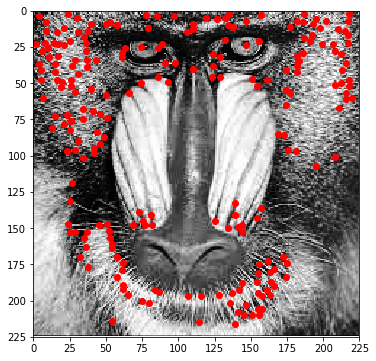

In [61]:
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)

The following  gure plots the extracted points of interest. Of the image's 230400 pixels, 466 were extracted as points of interest. This representation is much more compact; ideally, there is enough variation proximal to the points of interest to reproduce them despite changes in the image's illumination.

## SIFT and SURF


Scale-Invariant Feature Transform (SIFT) is a method for extracting features from an image that is less sensitive to the scale, rotation, and illumination of the image than the extraction methods we have previously discussed. Each SIFT feature, or descriptor, is
a vector that describes edges and corners in a region of an image. Unlike the points of interest in our previous example, SIFT also captures information about the composition of each point of interest and its surroundings. Speeded-Up Robust Features (SURF) is another method of extracting interesting points of an image and creating descriptions that are invariant of the image's scale, orientation, and illumination. SURF can be computed more quickly than SIFT, and it is more effective at recognizing features across images that have been transformed in certain ways.
Explaining how SIFT and SURF extraction are implemented is beyond the scope of
this book. However, with an intuition for how they work, we can still effectively use libraries that implement them.
In this example, we will extract SURF from the following image using the mahotas library.

In [66]:
import mahotas as mh
from mahotas.features import surf

In [69]:
image = mh.imread('cat.jpeg', as_grey=True)

In [71]:
image

array([[  23.,   12.,   19., ...,  131.,  126.,  119.],
       [  25.,   26.,   35., ...,  132.,  127.,  116.],
       [   6.,   12.,   29., ...,  135.,  129.,  117.],
       ..., 
       [ 116.,   67.,   13., ...,   61.,   87.,   77.],
       [  80.,    9.,   61., ...,   62.,   87.,   74.],
       [  12.,   48.,   51., ...,   72.,   99.,   77.]])

In [74]:
print('The first SURF descriptor: ', surf.surf(image)[0])
print('Extracted %s SURF descriptors' % len(surf.surf(image)))

The first SURF descriptor:  [  5.16334446e+01   4.86933299e+01   1.85906704e+00   7.42266089e+02
   1.00000000e+00   3.07981997e+00   2.78257844e-03   8.35347895e-04
   3.29116458e-03   1.14947362e-03  -1.82875969e-02  -8.36322338e-03
   4.04452448e-02   1.13477893e-02  -2.42682069e-02   7.70707028e-03
   4.82943131e-02   2.00610618e-02   5.19965360e-03  -4.38098079e-03
   6.51156381e-03   5.51206035e-03  -6.99804756e-03  -2.79691070e-02
   1.13657327e-02   3.49266593e-02   1.11345980e-01   1.56537087e-01
   1.24744276e-01   1.87833579e-01   1.09417339e-01  -2.21926971e-01
   1.78768419e-01   2.70634754e-01  -5.88337370e-03   3.71706606e-02
   3.90020707e-02   6.59915998e-02   1.54364616e-02  -2.58977872e-02
   1.67015426e-02   3.10121613e-02  -1.21580705e-01   9.06507738e-02
   5.18239726e-01   1.88148297e-01   8.18361526e-02  -7.69504779e-02
   5.59028811e-01   2.54198621e-01   9.12311143e-03   3.18904760e-02
   3.75840166e-02   4.78946503e-02  -1.19451617e-03   3.02722158e-04
   3.9

## Data standardization

In [75]:
from sklearn import preprocessing
import numpy as np


In [ ]:
X = np.array()